# K-Clustering in $R^1$

Objective:
 implementing a basic k-means clustering algorithm for 1-dimensional data $(R^1)$

In [224]:
# K-clustering in R^1
# impoort necessary modules
import random
import math # for math.inf

In [225]:
# Given fish_length list
fish_length = [3,5,7, 11, 13, 18, 20, 24, 30, 44, 45, 1,2,3,4,5,6,7,8, 9,10,21,32,33,46,12,15]

# Randomly pick k numbers from the list
k = 3

In [226]:
def pickCenters(array, number):
  random_samples = random.sample(array, number)
  random_samples.sort()
  return random_samples

In [227]:
# test
centers = pickCenters([3,4,5,7,1,2,4,7,8], 3)
print(centers)

[1, 7, 8]


In [228]:
def divideElements(array, centers):

  # create dictionary to hold arrays
  arrays_dict = {}

  # Iterate over each number in centers
  # name the key with a center
  for center in centers:
    arrays_dict[f"elements_near_{center}"] = []

  return arrays_dict

In [229]:
divideElements(fish_length, centers)

{'elements_near_1': [], 'elements_near_7': [], 'elements_near_8': []}

In [231]:
def divideElements(array, centers):

  # create dictionary to hold arrays
  arrays_dict = {}

  # Iterate over each number in centers
  # name the key with a center
  for center in centers:
    arrays_dict[f"elements_near_{center}"] = []

  # designate each element in array to a key
  for element in array:
    distance = math.inf # Initialize
    center_target = None

    for center in centers:
      measured_distance = ((element - center)**2)**0.5

      # update the distance
      if measured_distance < distance:
        distance = measured_distance       #update the distance
        center_target = center

    # append the integer
    arrays_dict[f"elements_near_{center_target}"].append(element)

  return arrays_dict

In [232]:
arrays_dict = divideElements(fish_length, centers)
arrays_dict

{'elements_near_1': [3, 1, 2, 3, 4],
 'elements_near_7': [5, 7, 5, 6, 7],
 'elements_near_8': [11,
  13,
  18,
  20,
  24,
  30,
  44,
  45,
  8,
  9,
  10,
  21,
  32,
  33,
  46,
  12,
  15]}

In [233]:
import numpy as np

def calculateMean(dictionary, centers):
  new_centers = []
  for index in range(len(dictionary)):
    mean = np.mean(dictionary[f"elements_near_{centers[index]}"])
    new_centers.append(mean)
  return new_centers

In [234]:
new_centers = calculateMean(arrays_dict, centers)
new_centers

[2.6, 6.0, 23.0]

In [235]:
new_arrays_dict = divideElements(fish_length, new_centers)
new_arrays_dict

{'elements_near_2.6': [3, 1, 2, 3, 4],
 'elements_near_6.0': [5, 7, 11, 13, 5, 6, 7, 8, 9, 10, 12],
 'elements_near_23.0': [18, 20, 24, 30, 44, 45, 21, 32, 33, 46, 15]}

In [236]:
if arrays_dict == new_arrays_dict:
  print("The same")
else:
  print("Not the same")

Not the same


In [237]:
# Function to perform k-means clustering until convergence
def kClustering(array, k):
    centers = pickCenters(array, k)
    clusters_history = [centers.copy()]

    while True:
        arrays_dict = divideElements(array, centers)
        new_centers = calculateMean(arrays_dict, centers)
        new_arrays_dict = divideElements(array, new_centers)

        if arrays_dict == new_arrays_dict:
            break

        centers = new_centers
        clusters_history.append(centers.copy())

    return clusters_history, arrays_dict

In [238]:
# Test the kClustering function
clusters_history, final_clusters = kClustering(fish_length, 3)
print(clusters_history)
print()
print(final_clusters)

[[4, 5, 33], [2.6, 9.692307692307692, 32.77777777777778], [3.625, 12.583333333333334, 36.285714285714285], [4.636363636363637, 15.3, 38.333333333333336], [5.0, 16.0, 38.333333333333336], [5.384615384615385, 16.75, 38.333333333333336], [5.785714285714286, 17.571428571428573, 38.333333333333336]]

{'elements_near_5.785714285714286': [3, 5, 7, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'elements_near_17.571428571428573': [13, 18, 20, 24, 21, 12, 15], 'elements_near_38.333333333333336': [30, 44, 45, 32, 33, 46]}


# Graphics

In [239]:
import random
import numpy as np
import matplotlib.pyplot as plt

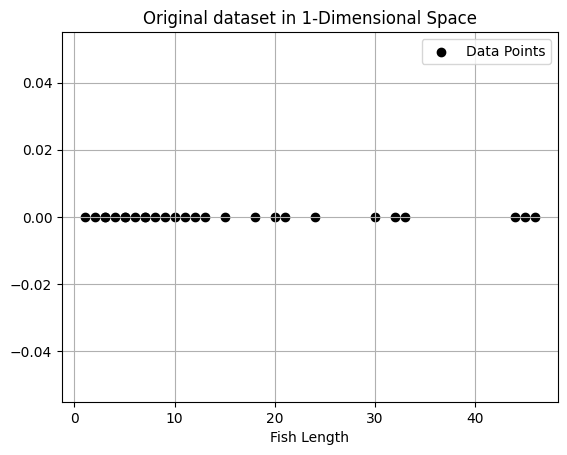

In [240]:
plt.scatter(fish_length, [0]*len(fish_length), color='black', label='Data Points')
plt.title('Original dataset in 1-Dimensional Space')
plt.xlabel('Fish Length')
plt.legend(loc='best')
plt.grid(True)
plt.show()

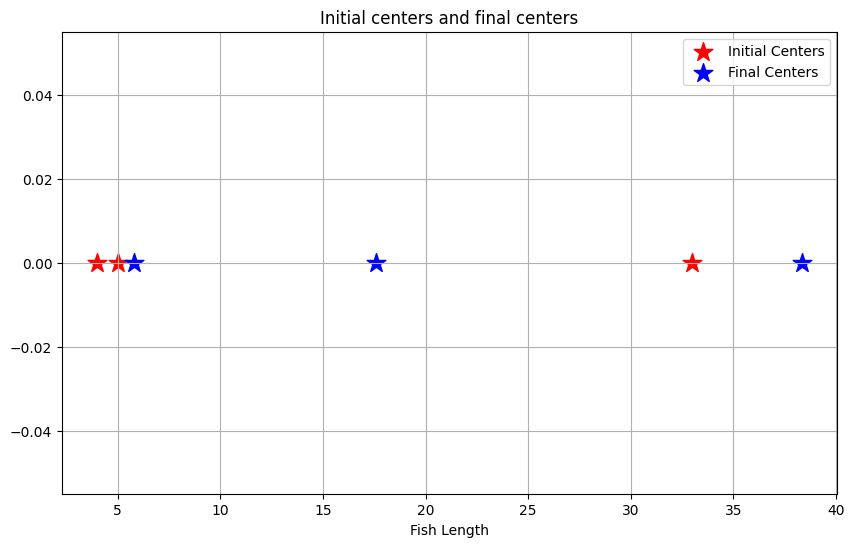

In [244]:
# Plotting the clusters and centroids
plt.figure(figsize=(10, 6))

# Plotting initial centers
initial_centers = clusters_history[0]
plt.scatter(initial_centers, [0]*len(initial_centers), color='red', marker='*', s=200, label='Initial Centers')

# Plotting final centers
final_centers = clusters_history[-1]
plt.scatter(final_centers, [0]*len(final_centers), color='blue', marker='*', s=200, label='Final Centers')

plt.title('Initial centers and final centers')
plt.xlabel('Fish Length')
plt.legend(loc='best')
plt.grid(True)
plt.show()


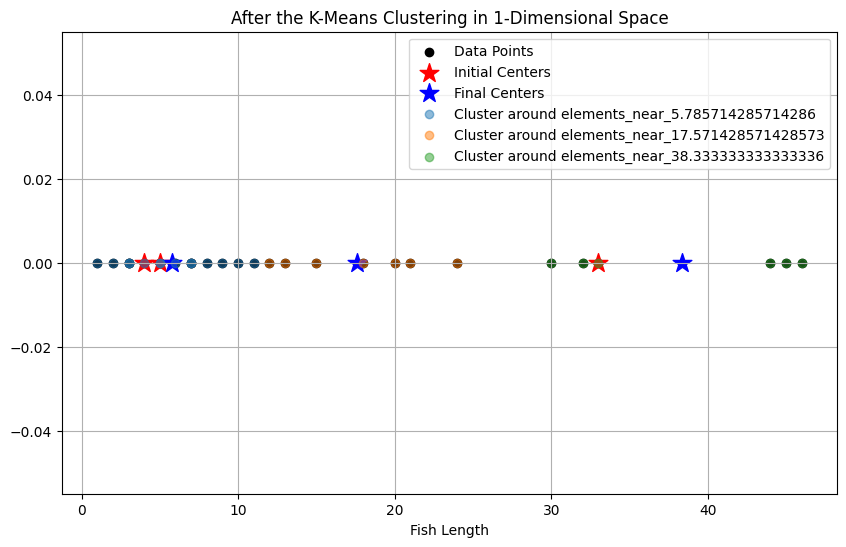

In [241]:
# Plotting the clusters and centroids
plt.figure(figsize=(10, 6))

# Plotting data points
plt.scatter(fish_length, [0]*len(fish_length), color='black', label='Data Points')

# Plotting initial centers
initial_centers = clusters_history[0]
plt.scatter(initial_centers, [0]*len(initial_centers), color='red', marker='*', s=200, label='Initial Centers')

# Plotting final centers
final_centers = clusters_history[-1]
plt.scatter(final_centers, [0]*len(final_centers), color='blue', marker='*', s=200, label='Final Centers')

# Plotting cluster assignments
for center in final_clusters:
    cluster_points = final_clusters[center]
    plt.scatter(cluster_points, [0]*len(cluster_points), alpha=0.5, label=f'Cluster around {center}')

plt.title('After the K-Means Clustering in 1-Dimensional Space')
plt.xlabel('Fish Length')
plt.legend(loc='best')
plt.grid(True)
plt.show()


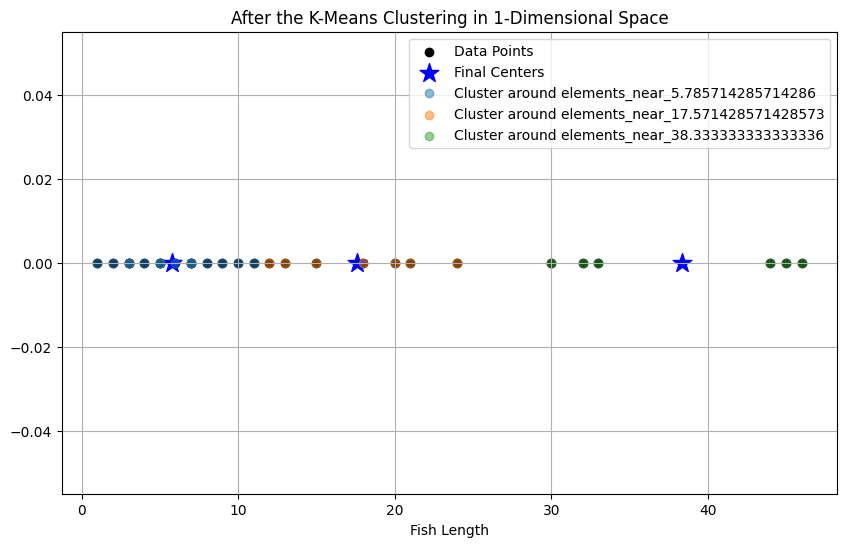

In [242]:
# Plotting the clusters and centroids
plt.figure(figsize=(10, 6))

# Plotting data points
plt.scatter(fish_length, [0]*len(fish_length), color='black', label='Data Points')

# Plotting final centers
final_centers = clusters_history[-1]
plt.scatter(final_centers, [0]*len(final_centers), color='blue', marker='*', s=200, label='Final Centers')

# Plotting cluster assignments
for center in final_clusters:
    cluster_points = final_clusters[center]
    plt.scatter(cluster_points, [0]*len(cluster_points), alpha=0.5, label=f'Cluster around {center}')

plt.title('After the K-Means Clustering in 1-Dimensional Space')
plt.xlabel('Fish Length')
plt.legend(loc='best')
plt.grid(True)
plt.show()
